In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [23]:
!pip install CFEDemands --pre

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [31]:
Sheets = {'ICRISAT':'13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo',
         'Ethiopia':'1HwlYKATyaCDnATGOt8mgzycgjzyzR6RnTQPF5rPrx6o',
         }
sheet_name = 'Ethiopia'

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [39]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets[sheet_name])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("HH Characteristics", Sheets[sheet_name])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [40]:
z.head()

M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  \
j            t    m                                                           
1.010102e+12 2011 1      0      1       1        1        0        1      0   
                  1      0      0       2        0        0        1      0   
                  1      0      0       0        0        0        0      0   
                  1      0      0       0        0        0        0      0   
                  1      0      0       0        0        0        0      1   

                     F 0-3  F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  \
j            t    m                                                           
1.010102e+12 2011 1      0      0       1        0        0        1      1   
                  1      0      1       1        0        0        1      0   
                  1      0      0       0        0        0        0      1   
                  1      0      0       2        0        1        0      1   
                  1      0      0       1        1        0        1      0   

                     log Hsize  
j            t    m             
1.010102e+12 2011 1   1.945910  
                  1   1.791759  
                  1   0.000000  
                  1   1.386294  
                  1   1.386294

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [41]:
y.head()

Banana  Barley  Beef  Beer  Boye/Yam  Bula  Butter/ghee  \
j            t    m                                                            
1.010102e+12 2011 1     NaN     NaN   NaN   NaN       NaN   NaN          NaN   
                  1     NaN     NaN   NaN   NaN       NaN   NaN          NaN   
                  1     NaN     NaN   NaN   NaN       NaN   NaN          NaN   
                  1     NaN     NaN   NaN   NaN       NaN   NaN          NaN   
                  1     NaN     NaN   NaN   NaN       NaN   NaN          NaN   

                     Cassava  Chat / Kat  Cheese  ...        Salt  \
j            t    m                               ...               
1.010102e+12 2011 1      NaN         NaN     NaN  ...    0.000000   
                  1      NaN         NaN     NaN  ...   -0.693147   
                  1      NaN         NaN     NaN  ...   -0.693147   
                  1      NaN         NaN     NaN  ...   -0.693147   
                  1      NaN         NaN     NaN  ...   -2.995732   

                     Soft drinks/Soda   Sorghum     Sugar  Sweet potato  Tea  \
j            t    m                                                            
1.010102e+12 2011 1               NaN       NaN  2.890372           NaN  NaN   
                  1               NaN       NaN       NaN           NaN  NaN   
                  1               NaN       NaN  1.609438           NaN  NaN   
                  1               NaN  4.430817  2.890372           NaN  NaN   
                  1               NaN       NaN  2.890372           NaN  NaN   

                     Teff  Tella  Tomato  Wheat  
j            t    m                              
1.010102e+12 2011 1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  

[5 rows x 56 columns]

## Estimation



With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [42]:
import cfe

result = cfe.Result(y=y,z=z)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [43]:
result

<xarray.Result>
Dimensions:           (i: 56, j: 3969, k: 15, m: 1, t: 2)
Coordinates:
  * j                 (j) float64 1.01e+12 1.01e+12 ... 1.501e+13 1.501e+13
  * t                 (t) int64 2011 2013
  * m                 (m) int64 1
  * i                 (i) <U40 'Banana' 'Barley' 'Beef' ... 'Tomato' 'Wheat'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 ... 0.6931 1.609 1.609
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None
 

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [44]:
result.get_reduced_form()

After running this we can examine the estimated coefficients $\delta$:



In [45]:
result.delta.to_dataframe().unstack('k')

delta                                                    \
k              F 0-3   F 14-18   F 19-30   F 31-50     F 4-8     F 51+   
i                                                                        
Banana      0.078442  0.128936  0.052524 -0.133569 -0.085223  0.017948   
Barley      0.098314  0.118677  0.074709 -0.102788 -0.074640 -0.191209   
Chat / Kat  0.196784  0.093238  0.231602  0.117191  0.274143  0.110629   
Chick Pea  -0.108322 -0.092534 -0.159743 -0.230672 -0.017042  0.023690   
Coffee     -0.046834  0.036163  0.086253 -0.001434 -0.074861 -0.094424   
Field Pea  -0.030942  0.100201  0.087565  0.067216  0.005546  0.052759   
Horsebeans -0.063752  0.029937 -0.013202 -0.056155 -0.035727 -0.090454   
Lentils     0.000336  0.048998  0.027081 -0.014308 -0.030315 -0.088568   
Linseed     0.027821 -0.141973  0.093051  0.107567 -0.072999  0.054642   
Maize       0.039413  0.039370  0.033080 -0.011249  0.056941 -0.019734   
Meat       -0.080876  0.033488  0.172162  0.076766  0.006325 -0.010999   
Milk        0.314571  0.225779  0.093433  0.032363  0.016909  0.116118   
Onion       0.020241  0.093720  0.127437 -0.016053  0.009192 -0.092261   
Potato      0.009784  0.051165  0.038190 -0.065233  0.012213 -0.024633   
Salt        0.024876  0.027817  0.036631 -0.003064 -0.004228 -0.023199   
Sorghum    -0.059021 -0.039766  0.057169  0.001460  0.035227 -0.092202   
Sugar       0.138786  0.042041  0.045332  0.013163  0.117612  0.026729   
Teff       -0.119179  0.090043  0.070417  0.013599 -0.002759 -0.149941   
Wheat       0.127154  0.078050 -0.019060 -0.011659  0.088689  0.042953   

                                                                        \
k             F 9-13     M 0-3   M 14-18   M 19-30   M 31-50     M 4-8   
i                                                                        
Banana     -0.002277 -0.131868  0.069165  0.021586  0.132735 -0.012444   
Barley     -0.048182 -0.108542  0.070797 -0.008857 -0.085635  0.023982   
Chat / Kat  0.162615  0.034534  0.076602  0.180151  0.121539  0.167660   
Chick Pea  -0.013670 -0.182225  0.046581  0.022474  0.035574  0.033658   
Coffee      0.031752 -0.076132  0.030159 -0.003386  0.094201 -0.027003   
Field Pea   0.066328 -0.013273  0.072701  0.039464  0.147069  0.004987   
Horsebeans  0.005051 -0.108776  0.123803  0.088143  0.024366 -0.012018   
Lentils     0.040630 -0.106649  0.063100  0.073658  0.130422  0.015828   
Linseed     0.002771  0.131215 -0.001211  0.058287 -0.045838 -0.026660   
Maize      -0.044546 -0.020611  0.078828  0.110957  0.153247  0.089453   
Meat       -0.065589 -0.157264 -0.007840  0.039951  0.118325 -0.051922   
Milk       -0.053876  0.019987  0.133778 -0.115119  0.007720  0.188044   
Onion       0.021511 -0.031158  0.091089  0.077972  0.093531 -0.019831   
Potato      0.017459  0.032765  0.056839  0.007498  0.073243  0.000794   
Salt        0.042673 -0.000760 -0.001574  0.017937  0.014105  0.003037   
Sorghum     0.060449 -0.133313  0.027020 -0.019637  0.032455  0.110776   
Sugar       0.074575  0.077581  0.085719  0.035305  0.007546  0.105280   
Teff        0.060445 -0.085155  0.098403  0.196785  0.228450  0.018928   
Wheat       0.023457  0.117212  0.095832  0.025807  0.043680  0.041701   

                                          
k              M 51+    M 9-13 log Hsize  
i                                         
Banana      0.037298 -0.049998  0.079801  
Barley     -0.068245 -0.052716  0.199277  
Chat / Kat  0.105399  0.041818 -0.428161  
Chick Pea   0.222618 -0.012469  0.487744  
Coffee      0.104366 -0.014749  0.176793  
Field Pea   0.084383  0.010332  0.097896  
Horsebeans -0.001105 -0.001526  0.391543  
Lentils     0.119526 -0.036662  0.161603  
Linseed    -0.052414  0.027759  0.143212  
Maize       0.148538  0.051576  0.428841  
Meat        0.111616 -0.032588  0.257422  
Milk        0.356864 -0.083608 -0.045747  
Onion       0.051862 -0.010477  0.052160  
Potato     -0.008550 -0.004265  0.191616  
Salt        0.028491  0.00

In [47]:
result.delta.to_dataframe().unstack('k').columns

MultiIndex(levels=[['delta'], ['F 0-3', 'F 14-18', 'F 19-30', 'F 31-50', 'F 4-8', 'F 51+', 'F 9-13', 'M 0-3', 'M 14-18', 'M 19-30', 'M 31-50', 'M 4-8', 'M 51+', 'M 9-13', 'log Hsize']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           names=[None, 'k'])

In [54]:
r = result.delta.to_dataframe().unstack('k')

groups = ['F 0-3', 'F 4-8', 'F 9-13', 'F 14-18', 'F 19-30', 'F 31-50', 'F 51+', 'M 0-3', 'M 4-8', 'M 9-13', 'M 14-18', 'M 19-30', 'M 31-50', 'M 51+']

for g in groups:
    print('Delta elasticities by value for {0}'.format(g))
    print(r['delta'][g].sort_values(), '\n')

Delta elasticities by value for F 0-3
i
Teff         -0.119179
Chick Pea    -0.108322
Meat         -0.080876
Horsebeans   -0.063752
Sorghum      -0.059021
Coffee       -0.046834
Field Pea    -0.030942
Lentils       0.000336
Potato        0.009784
Onion         0.020241
Salt          0.024876
Linseed       0.027821
Maize         0.039413
Banana        0.078442
Barley        0.098314
Wheat         0.127154
Sugar         0.138786
Chat / Kat    0.196784
Milk          0.314571
Name: F 0-3, dtype: float64 

Delta elasticities by value for F 4-8
i
Banana       -0.085223
Coffee       -0.074861
Barley       -0.074640
Linseed      -0.072999
Horsebeans   -0.035727
Lentils      -0.030315
Chick Pea    -0.017042
Salt         -0.004228
Teff         -0.002759
Field Pea     0.005546
Meat          0.006325
Onion         0.009192
Potato        0.012213
Milk          0.016909
Sorghum       0.035227
Maize         0.056941
Wheat         0.088689
Sugar         0.117612
Chat / Kat    0.274143
Name: F 4-8, dty

Also the good-time constants $a_{it}$:



In [55]:
result.a.to_dataframe().unstack('i')

a                                                     \
i         Banana    Barley Chat / Kat Chick Pea    Coffee Field Pea   
t    m                                                                
2011 1  1.484399  2.532234   4.029191  2.129279  2.680699  2.235294   
2013 1  1.805223  2.529737   4.174200  2.007086  2.573131  2.141522   

                                                                               \
i      Horsebeans   Lentils   Linseed     Maize      Meat      Milk     Onion   
t    m                                                                          
2011 1   2.239547  2.392656  1.542824  2.543117  3.634340  2.853143  1.806549   
2013 1   1.944725  2.411956  1.411401  2.402316  3.939069  2.951383  1.953178   

                                                                    
i         Potato      Salt   Sorghum     Sugar      Teff     Wheat  
t    m                                                              
2011 1  1.770036  0.290573  2.668980  2.309124  3.392302  2.990510  
2013 1  1.889422  0.509207  2.760167  2.252580  3.525376  2.841399

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [56]:
result.get_beta().to_dataframe()

,beta
i,
Banana,0.733348
Barley,1.727389
Chat / Kat,0.852257
Chick Pea,1.497051
Coffee,0.638286
Field Pea,0.878562
Horsebeans,0.991617
Lentils,0.552064
Linseed,0.342209


In [57]:
r = result.get_beta().to_dataframe()
print(r.sort_values(by=['beta']))

                beta
i                   
Linseed     0.342209
Salt        0.393059
Potato      0.426000
Onion       0.516151
Lentils     0.552064
Meat        0.616084
Coffee      0.638286
Milk        0.656783
Banana      0.733348
Teff        0.777293
Sugar       0.810345
Chat / Kat  0.852257
Field Pea   0.878562
Horsebeans  0.991617
Maize       1.223944
Sorghum     1.257332
Chick Pea   1.497051
Wheat       1.631447
Barley      1.727389


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



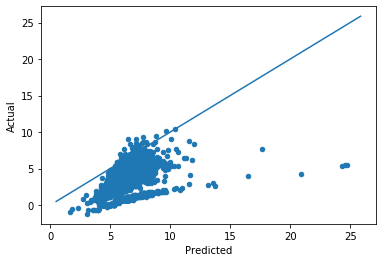

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])